In this project we apply **linear regression** to predict the solubility of molecules. To achieve that we use the SMILES notation of the molecules in order to obtain some molecular descriptors of interest using **rdkit**.

Specifically, the 4 molecular descriptors employed to predict the solubility (LogS) in the linear regression model are:

* cLogP: Octanol-water partition coefficient.
* MolWt: Molecular weigth
* RB: Number of rotatable bonds
* AP: Aromatic proportion = number of aromatic atoms / number of heavy atoms

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('delaney.csv')
data

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [4]:
data.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [5]:
from rdkit import Chem

In [6]:
m = Chem.MolFromSmiles(data.SMILES[0])
m.GetNumAtoms()

6

Convert list of molecules in SMILES notation to rdkit objects

In [7]:
molecules = [Chem.MolFromSmiles(x) for x in data.SMILES]
molecules[:5]

## Calculate molecular descriptors

In [8]:
from rdkit.Chem import Descriptors

In [9]:
def num_aromatic_atoms(m):
    # Iterate over the atoms of the molecule and get a boolean list based on the aromatic property
    return sum([m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())])

In [10]:
def compute_descriptors(molecules):
    MolLogP = []
    MolWt = []
    NumRotatableBonds = []
    AromaticProportion = []

    for m in molecules:
        MolLogP.append(Descriptors.MolLogP(m))
        MolWt.append(Descriptors.MolWt(m))
        NumRotatableBonds.append(Descriptors.NumRotatableBonds(m))
        AromaticProportion.append(num_aromatic_atoms(m) / m.GetNumHeavyAtoms())

    descriptors = pd.DataFrame({
        'MolLogP': MolLogP,
        'MolWt': MolWt,
        'NumRotatableBonds': NumRotatableBonds,
        'AromaticProportion': AromaticProportion
    })

    return descriptors

In [11]:
descriptors = compute_descriptors(molecules)
descriptors

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0,0.000000
1,2.37650,133.405,0,0.000000
2,2.59380,167.850,1,0.000000
3,2.02890,133.405,1,0.000000
4,2.91890,187.375,1,0.000000
...,...,...,...,...
1139,1.98820,287.343,8,0.000000
1140,3.42130,286.114,2,0.333333
1141,3.60960,308.333,4,0.695652
1142,2.56214,354.815,3,0.521739


In [12]:
data.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [13]:
y = data['measured log(solubility:mol/L)']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [40]:
X_y_data = pd.concat([descriptors, y], axis=1)
X_y_data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,measured log(solubility:mol/L)
0,2.59540,167.850,0,0.000000,-2.180
1,2.37650,133.405,0,0.000000,-2.000
2,2.59380,167.850,1,0.000000,-1.740
3,2.02890,133.405,1,0.000000,-1.480
4,2.91890,187.375,1,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8,0.000000,1.144
1140,3.42130,286.114,2,0.333333,-4.925
1141,3.60960,308.333,4,0.695652,-3.893
1142,2.56214,354.815,3,0.521739,-3.790


In [41]:
X_y_data.to_csv('delaney_descriptors_with_solubility.csv', index=False)

## Data split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(descriptors, y, test_size=0.2)

In [16]:
X_train.shape, y_train.shape

((915, 4), (915,))

In [17]:
X_test.shape, y_test.shape

((229, 4), (229,))

## Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
import numpy as np
np.set_printoptions(suppress=True)

In [22]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Coefficient of determination (R2): {r2_score(y_test, y_pred)}')

Coefficients: [-0.77135095 -0.00642635 -0.0020653  -0.44740209]
Intercept: 0.29706739363219326
MSE: 1.105635257852725
Coefficient of determination (R2): 0.7450888027215181


## Linear Regression Equation

In [23]:
print(f'LogS = {model.intercept_:.2f} {model.coef_[0]:.2f} LogP {model.coef_[1]:.2f} MW {model.coef_[2]:.2f} RB {model.coef_[3]:.2f} AP')

LogS = 0.30 -0.77 LogP -0.01 MW -0.00 RB -0.45 AP


## Scatter plot of experimental vs predicted LogS

In [24]:
import matplotlib.pyplot as plt

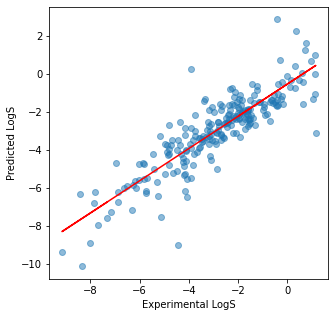

In [38]:
plt.figure(figsize=(5,5))

plt.scatter(x=y_test, y=y_pred, alpha=0.5)

# Trendline
z = np.polyfit(y_test, y_pred, deg=1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'red')

# Axis labels
plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')

plt.savefig('regression_plot.png')